In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sample - Superstore.csv.zip to Sample - Superstore.csv.zip


In [ ]:
import pandas as pd
import zipfile, io
fn = list(uploaded.keys())[0]
if fn.endswith('.zip'):
    zf = zipfile.ZipFile(io.BytesIO(uploaded[fn]))
    csv_name = [name for name in zf.namelist() if name.endswith('.csv')][0]
    df = pd.read_csv(zf.open(csv_name))
else:
    df = pd.read_csv(io.BytesIO(uploaded[fn]))

df.head()


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 2944: invalid start byte

In [ ]:
from google.colab import files
import pandas as pd, zipfile, io


In [ ]:
from google.colab import files
import pandas as pd, zipfile, io

uploaded = files.upload()
fn = list(uploaded.keys())[0]

zf = zipfile.ZipFile(io.BytesIO(uploaded[fn]))
csv_name = [name for name in zf.namelist() if name.endswith('.csv')][0]

df = pd.read_csv(zf.open(csv_name), encoding='latin1')
df.head()


Saving Sample - Superstore.csv.zip to Sample - Superstore.csv (1).zip


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.head()
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Month'] = df['Order Date'].dt.to_period('M').astype(str)


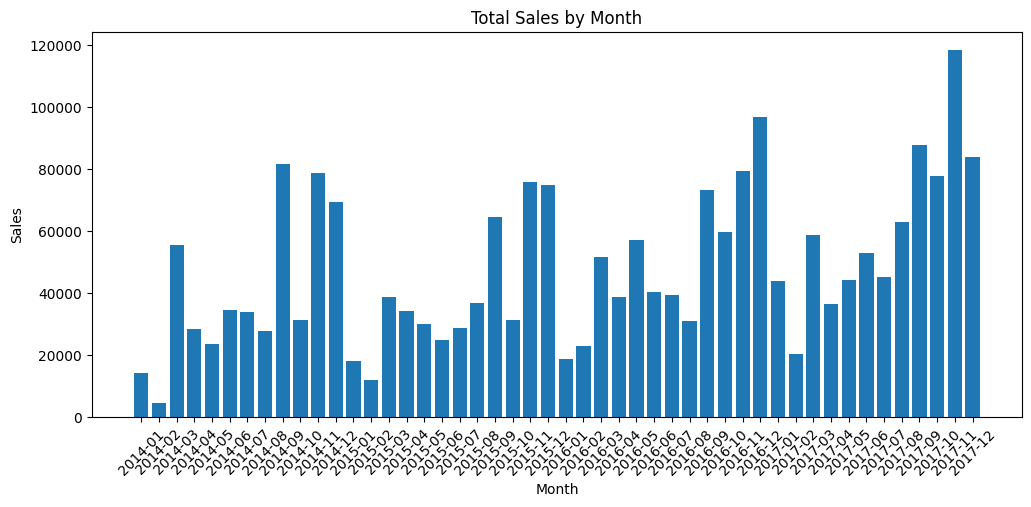

In [ ]:
import matplotlib.pyplot as plt

sales_by_month = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(12,5))
plt.bar(sales_by_month['Month'], sales_by_month['Sales'])
plt.xticks(rotation=45)
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


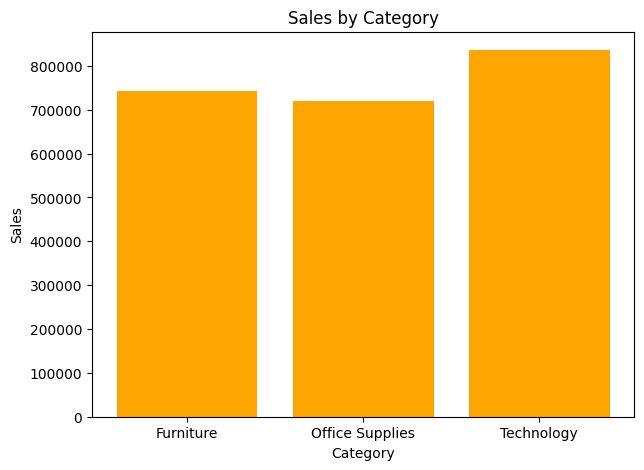

In [ ]:
sales_by_cat = df.groupby('Category')['Sales'].sum().reset_index()

plt.figure(figsize=(7,5))
plt.bar(sales_by_cat['Category'], sales_by_cat['Sales'], color='orange')
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()


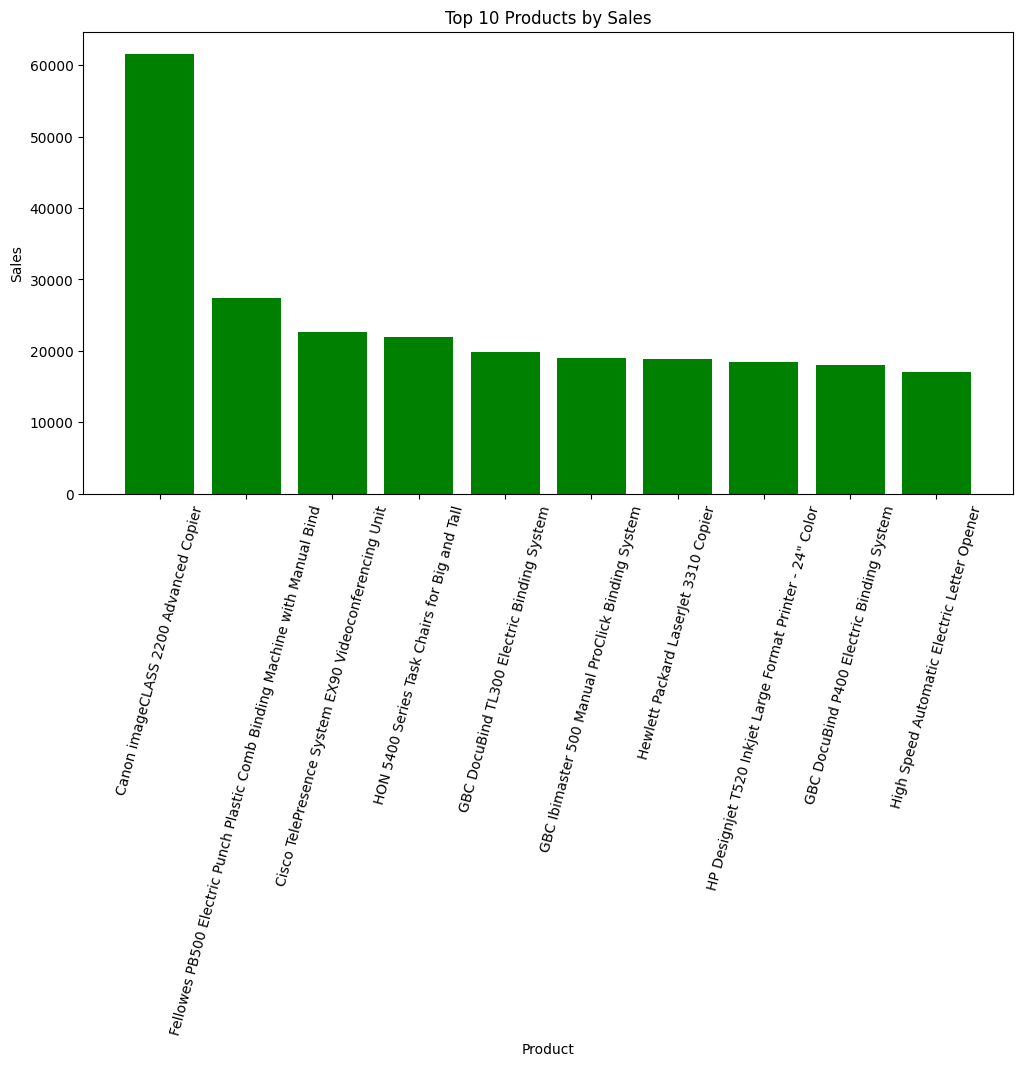

In [ ]:
top_products = df.groupby('Product Name')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(12,6))
plt.bar(top_products['Product Name'], top_products['Sales'], color='green')
plt.xticks(rotation=75)
plt.title("Top 10 Products by Sales")
plt.xlabel("Product")
plt.ylabel("Sales")
plt.show()


In [ ]:
df.to_csv("superstore_clean.csv", index=False)
